In [2]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [3]:
import matplotlib.pyplot as plt

# Fetch Data

In [4]:
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

#### The first number in the output tuple is the number of images, and the other two numbers are the size of the images in datset. So, each image is 28 pixels by 28 pixels.

AxesImage(size=(28, 28))


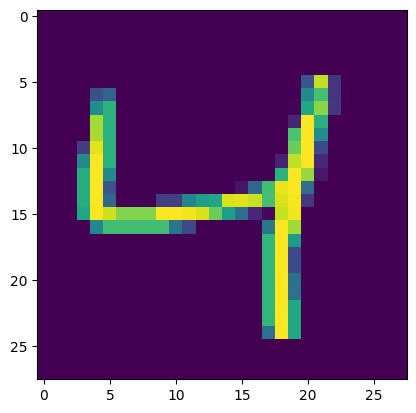

In [6]:
print(plt.imshow(X_train[2]))

#### With conventional neural networks, we cannot feed in the image as input as is. So we need to flatten the images into one-dimensional vectors, each of size 1 x (28 x 28) = 1 x 784.

In [7]:
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2]

# flattening training images
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
# flattening test images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [8]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

#### Before we start building our model, remember that for classification we need to divide our target variable into categories. We use the to_categorical function from the Keras Utilities package.

In [9]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]

In [10]:
print(num_classes)

10


# Build a Neural Network

In [11]:
# define classification model
def classification_model():
  # create model
  model = Sequential()
  model.add(Dense(num_pixels, activation = 'relu', input_shape = (num_pixels, )))
  model.add(Dense(100, activation = 'relu'))
  model.add(Dense(num_classes, activation = 'softmax'))

  # compile model
  model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

  return model

In [12]:
X_train.shape

(60000, 784)

# Train and test the network

In [13]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, verbose = 2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose = 0)

Epoch 1/10
1875/1875 - 28s - loss: 0.1855 - accuracy: 0.9445 - val_loss: 0.1247 - val_accuracy: 0.9600 - 28s/epoch - 15ms/step
Epoch 2/10
1875/1875 - 21s - loss: 0.0804 - accuracy: 0.9748 - val_loss: 0.0696 - val_accuracy: 0.9774 - 21s/epoch - 11ms/step
Epoch 3/10
1875/1875 - 19s - loss: 0.0539 - accuracy: 0.9829 - val_loss: 0.0641 - val_accuracy: 0.9810 - 19s/epoch - 10ms/step
Epoch 4/10
1875/1875 - 22s - loss: 0.0408 - accuracy: 0.9870 - val_loss: 0.0703 - val_accuracy: 0.9802 - 22s/epoch - 12ms/step
Epoch 5/10
1875/1875 - 19s - loss: 0.0319 - accuracy: 0.9901 - val_loss: 0.0820 - val_accuracy: 0.9776 - 19s/epoch - 10ms/step
Epoch 6/10
1875/1875 - 20s - loss: 0.0247 - accuracy: 0.9921 - val_loss: 0.0719 - val_accuracy: 0.9817 - 20s/epoch - 11ms/step
Epoch 7/10
1875/1875 - 20s - loss: 0.0246 - accuracy: 0.9921 - val_loss: 0.0736 - val_accuracy: 0.9815 - 20s/epoch - 11ms/step
Epoch 8/10
1875/1875 - 21s - loss: 0.0195 - accuracy: 0.9938 - val_loss: 0.0880 - val_accuracy: 0.9794 - 21s/ep

In [14]:
print(f"Accuracy: {scores[1]}%  \n Error: {1-scores[1]}")

Accuracy: 0.9842000007629395%  
 Error: 0.015799999237060547


In [15]:
model.save('classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
from keras.models import load_model

In [17]:
pre_trained_model = load_model('classification_model.h5')

In [18]:
print(pre_trained_model)